In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import metrics

In [10]:
df=load_boston()


In [11]:
type(df)

sklearn.utils.Bunch

In [12]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [13]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
dataset["PRICE"]=df.target

In [16]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [31]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
mean_mse

-37.131807467699204

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [33]:
X_train.shape

(339, 13)

In [37]:
X_test.shape

(167, 13)

In [39]:
y_train.shape

(339,)

In [34]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred=lin_reg.predict(X_test)
meanAbErr = metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 3.561719028166868


In [53]:
x_test=np.arange(0,len(X_test),1)
x_test.shape

(167,)

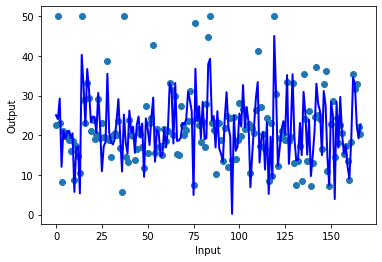

In [56]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='blue', linewidth = 2)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

Text(0, 0.5, 'Residual')

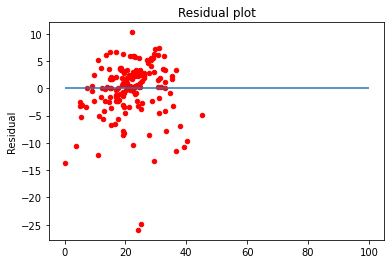

In [59]:
#Residual plot
plt.scatter(lin_reg.predict(X_test), lin_reg.predict(X_test) - y_test, c='r', s = 20)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [60]:
print('R squared: {:.2f}'.format(lin_reg.score(X_test,y_test)*100))

R squared: 67.06


In [61]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [62]:
print(ridge_regressor.best_params_)

{'alpha': 20}


In [63]:
ridge_regressor.best_score_

-32.38025025182522

In [72]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,45,55,65,75,90,100]}

lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)


C:\Users\TEJKIRAN\anaconda3\envs\TejEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\TEJKIRAN\anaconda3\envs\TejEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\TEJKIRAN\anaconda3\envs\TejEnv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check th

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 45, 55, 65, 75, 90, 100]},
             scoring='neg_mean_squared_error')

In [73]:
lasso_regressor.best_params_

{'alpha': 1}

In [74]:
lasso_regressor.best_score_

-35.531580220694856

In [77]:
y_pred=lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2score=r2_score(y_pred,y_test)
r2score

0.38786044797317976

In [20]:
## Logistic Regression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [21]:
df=load_breast_cancer()
X=pd.DataFrame(df["data"],columns=df['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
y=pd.DataFrame(df['target'],columns=['Target'])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [23]:
y['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [25]:
params=[{'C':[1,5,10]},{'max_iter':[100,150]}]

In [26]:
log_reg=LogisticRegression(C=100,max_iter=100)

In [27]:
model=GridSearchCV(log_reg,params,scoring="f1",cv=5)

In [28]:
model.fit(X_train,y_train)

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the num

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [29]:
model.best_params_

{'max_iter': 150}

In [30]:
model.best_score_

0.9603472310409715

In [31]:
y_pred=model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [36]:
confusion_matrix(y_pred,y_test)

array([[ 66,   9],
       [  1, 112]], dtype=int64)

In [37]:
accuracy_score(y_pred,y_test)

0.9468085106382979

In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93        75
           1       0.93      0.99      0.96       113

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188

